In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

import math

In [2]:
data = sio.loadmat("data.mat")
res = data["res"].T
doses = data["doses"].T
Zr = data["cases"].T
Dr = data["deaths"].T
A = data["hospitalized"].T
t = data["time"].T

Zr[Zr <= 0] = 0 # 1e-8
Dr[Dr <= 0] = 0 #1e-8
A[A <= 0] = 0 #1e-8

In [3]:
# 7-day smoothing
# e.g., cases_7d_smoothed[i] = average of cases[i-3:i+3]
NUM_OF_DAYS = 931
res_7d_smoothed = []
doses_7d_smoothed = []
Zr_7d_smoothed = []
Dr_7d_smoothed = []
A_7d_smoothed = []
t_7d_smoothed = np.arange(NUM_OF_DAYS)
for i in range(NUM_OF_DAYS):
    res_7d_smoothed.append(np.average(res[max(0, i-3):min(NUM_OF_DAYS, i+4)]))
    doses_7d_smoothed.append(np.average(doses[max(0, i-3):min(NUM_OF_DAYS, i+4)]))
    Zr_7d_smoothed.append(np.average(Zr[max(0, i-3):min(NUM_OF_DAYS, i+4)]))
    Dr_7d_smoothed.append(np.average(Dr[max(0, i-3):min(NUM_OF_DAYS, i+4)]))
    A_7d_smoothed.append(np.average(A[max(0, i-3):min(NUM_OF_DAYS, i+4)]))

In [4]:
data_7d_smoothed = {
    "res": res_7d_smoothed,
    "doses": doses_7d_smoothed,
    "cases": Zr_7d_smoothed,
    "deaths": Dr_7d_smoothed,
    "hospitalized": A_7d_smoothed,
    "time": t_7d_smoothed
}
sio.savemat('data/data_7d_smoothed.mat', data_7d_smoothed)

In [5]:
# weekly smoothing
# e.g., cases_7d_smoothed[i] = average of cases[i*7:(i+1)*7]
NUM_OF_WEEKS = 133
# NUM_OF_DAYS = 931
res_weekly_avg = []
doses_weekly_avg = []
Zr_weekly_avg = []
Dr_weekly_avg = []
A_weekly_avg = []
t_weekly_avg = np.arange(NUM_OF_WEEKS)
for i in range(NUM_OF_WEEKS):
    res_weekly_avg.append(np.average(res[i*7:(i+1)*7]))
    doses_weekly_avg.append(np.average(doses[i*7:(i+1)*7]))
    Zr_weekly_avg.append(np.average(Zr[i*7:(i+1)*7]))
    Dr_weekly_avg.append(np.average(Dr[i*7:(i+1)*7]))
    A_weekly_avg.append(np.average(A[i*7:(i+1)*7]))

In [6]:
data_weekly_avg = {
    "res": res_weekly_avg,
    "doses": doses_weekly_avg,
    "cases": Zr_weekly_avg,
    "deaths": Dr_weekly_avg,
    "hospitalized": A_weekly_avg,
    "time": t_weekly_avg
}
sio.savemat('data/data_weekly_avg.mat', data_weekly_avg)

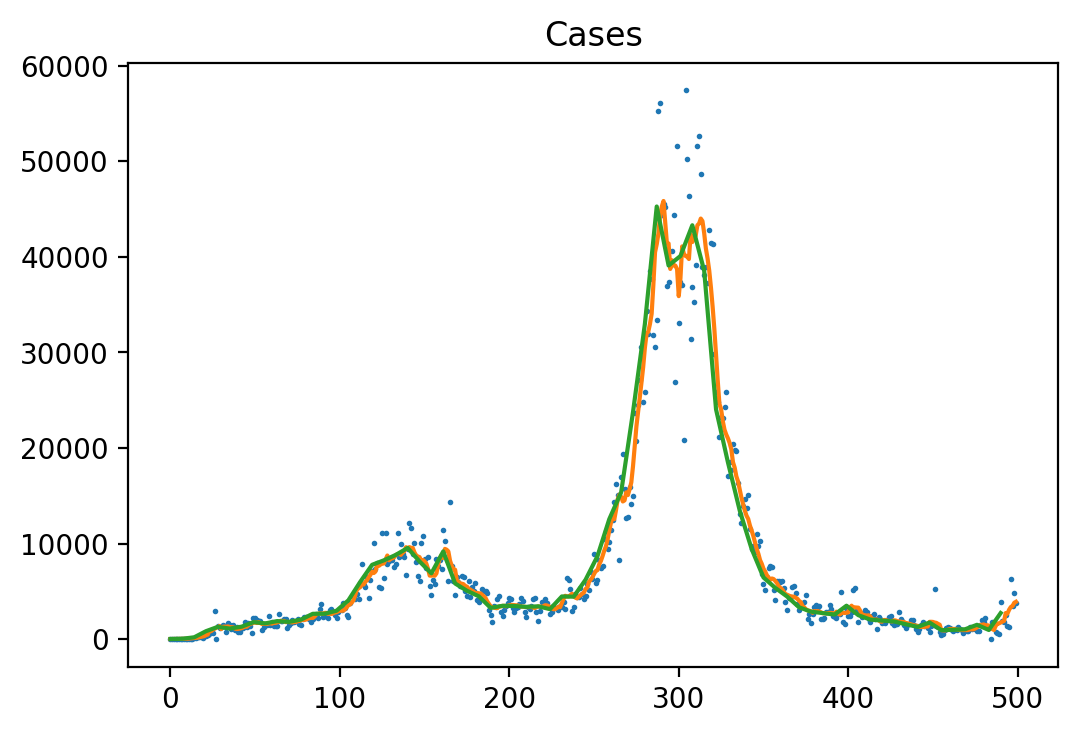

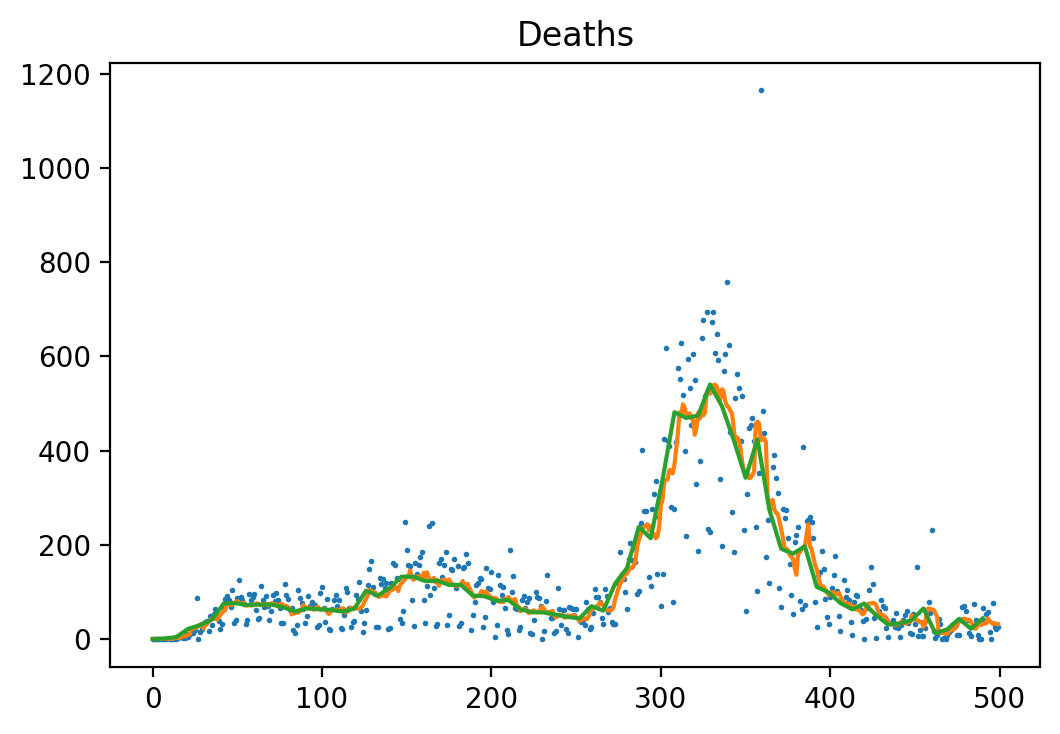

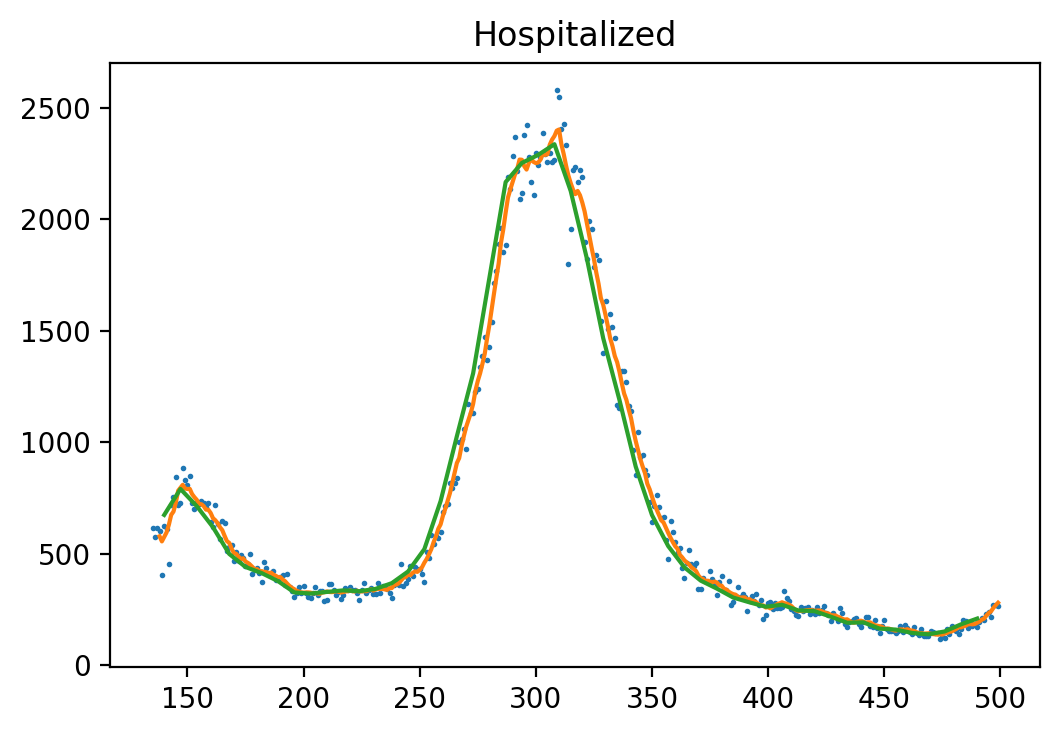

In [7]:
plt.figure(dpi=200)
plt.plot(t[:500], Zr[:500], '.', markersize=2, label="original data")
plt.plot(t[:500], Zr_7d_smoothed[:500], label="7d smoothed")
plt.plot(t_weekly_avg[:math.floor(500/7)]*7, Zr_weekly_avg[:math.floor(500/7)], label="weekly average")
plt.title("Cases")
plt.show()

plt.figure(dpi=200)
plt.plot(t[:500], Dr[:500], '.', markersize=2, label="original data")
plt.plot(t[:500], Dr_7d_smoothed[:500], label="7d smoothed")
plt.plot(t_weekly_avg[:math.floor(500/7)]*7, Dr_weekly_avg[:math.floor(500/7)], label="weekly average")
plt.title("Deaths")
plt.show()

plt.figure(dpi=200)
plt.plot(t[:500], A[:500], '.', markersize=2, label="original data")
plt.plot(t[:500], A_7d_smoothed[:500], label="7d smoothed")
plt.plot(t_weekly_avg[:math.floor(500/7)]*7, A_weekly_avg[:math.floor(500/7)], label="weekly average")
plt.title("Hospitalized")
plt.show()